Resistive wall wakefield calculation


In [1]:
import numpy as np
import scipy as sp
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import cumulative_trapezoid

In [2]:
#dc conductivity
n = 1.0 # density of conduction electrons
e = 1.6e-19 # the charge of the electron
tau = 2 # relaxation time
m = 9.1093837e-31 # mass of the electron

c = 299792458 # speed of light [m/s]
Lu = 10 # undulator lenght
L = 1.6e-12 # impedance per unit lenght
Ne = 1e-10 # [C]
sigma_z = 20e-6 # bunch lenght
s = sigma_z
sigma = 3.2e17#n*e*e*tau/m
E = 140e6*1.6e-19
a=4e-3
Lb = 1.9e-3*1e-12 # 2.7e-4]
L = Lb/a
re = 2.82e-15
N = Ne/e

In [3]:
N

625000000.0

In [4]:
#ac conductivity
k = smp.Symbol('k', real=True)
x = smp.Symbol('x', real=True)
#sigma_ac = sigma/(1-I*k*c*tau)
#print(sigma_ac)

In [5]:
c**2

89875517873681764

 beam-tube roughness

In [6]:
dErms = (Ne*e*Lu*L*c**2)/(3**(3/4)*2**0.5*3.141592**0.5*sigma_z**2)

In [7]:
dErms/E

0.00013341853218981818

In [8]:
s0=(c*a**2/(2*np.pi*sigma))**(1/3)

In [9]:
s0

1.3361963455380056e-05

In [10]:
def f(x, s, s0):
    return x**2*np.e**(-x**2*s/s0)/(x**6+8)

In [11]:
integ = quad(f,0,1e-3, args=(10e-6,s0))

In [12]:
integ

(4.166664795684651e-11, 4.625927192064173e-25)

In [13]:
def wake_conduct(s):
    return (16/a**2)*((np.e**(-s/s0)/3)*np.cos(np.sqrt(3)*s/s0)-(np.sqrt(2)/np.pi)*integ[0])


In [14]:
#w = 16/a**2*(np.e**(-s/s0)/3*np.cos(np.sqrt(3)*s/s0)-np.sqrt(2)/np.pi*integ[0])
w = wake_conduct(s)

In [15]:
w

-63647.82607656387

In [16]:
eq1 = 4/3 * a**(1/3)*(c/(2*3.1415*sigma))**(2/3)

In [17]:
eq1

5.951519263672942e-08

In [18]:
args = np.linspace(0,6*s0,128)
ds = 6*s0/128
args2 = np.linspace(0,40e-6,128)

In [19]:
s0

1.3361963455380056e-05

In [20]:
result = []
bunch = []
bunch_amplitude = Ne/(sigma_z*e)
for arg in args:
    result.append(wake_conduct(arg))
for arg2 in args2:
    if arg2 <= 20e-6:
        bunch.append(1/sigma_z)
    else:
        bunch.append(0)

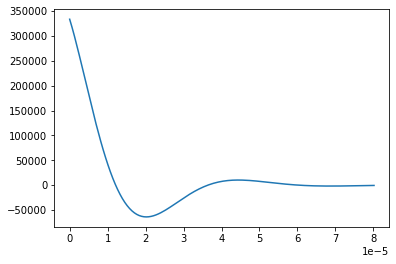

In [21]:
plt.plot(args,result)#*(a**2)/4

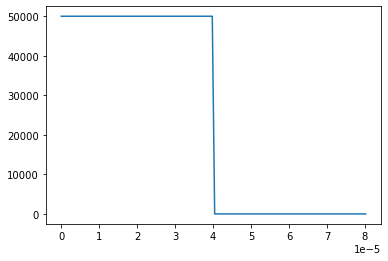

In [22]:
plt.plot(args, bunch)

In [23]:
conv = np.convolve(result, bunch)
conv = conv*ds

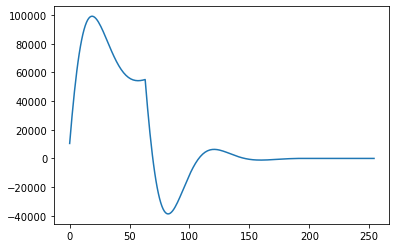

In [24]:
plt.plot(conv)

In [25]:
result = (conv*10*N*re/140)


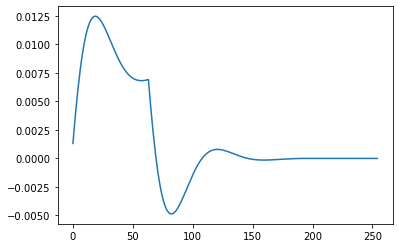

In [26]:
plt.plot(result)